# Eaton and Palisades False Color Imagery and Social Impact Analysis

### Author: Richard Montes Lemus


[Link to Github Repository](https://github.com/richardmonteslemus/eds220-hwk4)
- This repository contains code, file structures, and references for the following Eaton and Palisades fire analysis. 

![Figure 1. Burned car due to Eaton Fire](/posts/eaton-palisades-fires-analysis/burn_car.png)

**Figure 1.** Burned car due to Eaton Fire.  
*Photo by Frederic J. Brown/AFP via Getty Images.*

# About

### Purpose: 
The Eaton and Palisades fires of January 2025, exacerbated by Santa Ana winds, wreaked havoc across Southern California. Thousands of homes were burned and residents displaced.

This notebook uses false color imagery to visualize the aftermath of the Eaton and Palisades fires as of February 23, 2025.

Furthermore, this analysis examines limited English proficiency (LEP) populations within the fire perimeters to highlight language barriers during emergency response. Emergency alerts were disseminated only in English and Spanish, leaving communities speaking other languages without access to life-saving information. According to UCLA researchers, nearly 50,000 Asian Americans were impacted by these fires, with over 12,000 having limited English proficiency and facing significant communication barriers.

**Data Limitation:** The LEP metric used in this analysis includes all individuals who speak English "less than well," which includes Spanish speakers who did receive alerts in Spanish. This means the visualizations overestimate the population that was truly excluded from emergency communications. Ideally, this analysis would isolate non-English, non-Spanish speaking populations, but this data is not available in the current EJScreen dataset. Despite this limitation, the maps still reveal census tracts with high concentrations of language isolated populations and highlight the need for more multilingual emergency alert systems.

### Highlights: 
- Plotting RGB true color map 
- Plotting False-color image map (SWIR‑NIR‑Red)
- Plotting False-color image map (SWIR‑NIR‑Red) within Eaton and Palisades parameters
- Plotting census tracts with limited English proficiency within Eaton and Palisades parameters

### Data descriptions: 
**Eaton_Perimeter_20250121.shp** 
- This data consists of Eaton dissolved perimeter data from Los Angeles County.

**Palisades_Perimeter_20250121.shp**
- This data consists of Palisades dissolved perimeter data from Los Angeles County.

**landsat8-2025-02-23-palisades-eaton.nc**
- This Landsat data consists of atmospherically corrected surface reflectance and surface temperature image data. 

**EJI_2024_California.gdp**
- This data consist of several environmental justice variables and corresponsing census tracts and geometry. 

### References: 

[1] ArcGIS Online. Palisades and Eaton Dissolved Fire Perimeters as of 20250121 [Feature service], published Jan 21, 2025. Available: https://services.arcgis.com/RmCCgQtiZLDCtblq/arcgis/rest/services/Palisades_and_Eaton_Dissolved_Fire_Perimeters_as_of_20250121/FeatureServer/0
. [Accessed Nov 22, 2025].

[2] Agency for Toxic Substances and Disease Registry (ATSDR). _Environmental Justice Index (EJI) 2022_ [data file], published 2022. Centers for Disease Control and Prevention. Available: https://www.atsdr.cdc.gov/place-health/php/eji/eji-data-download.html. [Accessed Dec 3, 2025].

[3] UCLA Asian American Studies Center. (2025). Asian American language needs in L.A. wildfires (Data brief). https://www.aasc.ucla.edu/resources/AsianAmericanLanguageNeedsInLAWildfires.pdf. [Accessed Dec 11, 2025]

[4] U.S. Geological Survery. _Landsat Collection 2 Level-2 Surface Reflectance (Microsoft Planetary Computer Version)_ [data file], published 2022. Available: https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2. [Accessed Nov 22, 2025]


# Eaton and Palisades False Color Imagery 

The following section will use false color imagery to visualize fire scars from the Eaton and Palisades fires. 

### Import necessary libraries

The following libraries will allow me to perform my analysis. Importantly `xarray` is used to work with multi-dimensional arrays like NETCDF. `netCDF4` is used to read in data in the NetCDF format - a common format for climate/satelite data. And `contextily` will be used for adding a basemap to map.

In [24]:
# Import libraries
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr   
import netCDF4
import contextily as ctx

### Read in fire perimeter data 

This step reads in two seperate shapefiles of the Eaton and Palisades fire perimeters represented as polygons. These contain "Heat Perimeter" polygons showing fire boundaries.

In [25]:
# Read in Palisades and Eaton fire perimeter data 
fp_eaton = os.path.join('data','Eaton_Perimeter_20250121','Eaton_Perimeter_20250121.shp')
eaton = gpd.read_file(fp_eaton)

fp_pal = os.path.join('data','Palisades_Perimeter_20250121','Palisades_Perimeter_20250121.shp')
palisades = gpd.read_file(fp_pal)

### Check fire perimeter CRS

The following lines of code extract the CRS of our fire perimeter data. They are both EPSG:3857, the Web Mercator projected coordinate system.

In [26]:
# Check the projection and coordinate reference system of data 
print(eaton.crs)

EPSG:3857


In [27]:
# Check the projection and coordinate reference system of data 
print(palisades.crs)

EPSG:3857


### Explore fire perimeter data contents

Both the fire perimeters contain the following columns, `OBJECTID`, `type`, `Shape_Are`, `Shape_Len`, and `Geometry` for each row representing an individual polygon feature. `OBJECTID` is an int64 type and the unique identifier, `type` is an object containing a string describing the feature." `Shape_Are` is a float64 data type containing a number representing the area of the polygon, and `Shape_Len` is a float64 data type containg a number representing the length of the polygon. Lastly, the `geometry` column is a geometry data type containing the polygon spatial object used for mapping. 

In [28]:
# Check the first 5 rows of data 
eaton.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1464.550781,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4132.753906,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."


In [29]:
# Check the first 5 rows of data 
palisades.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,21.011719,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,214.992188,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,44203.453125,1569.259764,"POLYGON ((-13194209.580 4033236.320, -13194209..."


In [30]:
# Check data column types 
eaton.dtypes

OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [31]:
# Check data column types 
palisades.dtypes

OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

### Read in satellite imagery data

Read in Landsat satelite imagery from February 23, 2025 in NetCDF format using xarray.

In [32]:
# Read in collection of bands data 
landsat = xr.open_dataset(os.path.join("data","landsat8-2025-02-23-palisades-eaton.nc"))

### Explore satelite imagery data

This Landsat data is stored in a NetCDF data format with each layer being a matrix. Upon exploring this data, I found that it is 3 dimensional. it contains one layer representing time, and another two representing x and y coordinates on a map. Y coordinates decrease as you go down (south) and X coordinates increase as you go right (east). Its CRS is EPSG:32611 (UTM Zone 11N), its units are meters, and its resolution is 30 meters and it is projected. It contains the red, green, blue, nir08, and swir22 bands. Red, green, and blue bands are within the visible light spectrum humans see, they represent images in their "true color" form. Nir08 is a band within the near-infrared spectrum, vegetation is highly reflective in this spectrum. Swir22 is a band within the shortwave infrared spectrum, burn scars are highly reflective in this spectrum.

In [33]:
# Print Landsat data and explore contents
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

### Restoring geospatial information

The landsat data is not recognized as a geospatial object since it is loaded in as a plain `xarray.Dataset` and therefore its coordinate reference system cannot be be extracted using `rio.crs`. 

In [34]:
# Print crs of band data
print('CRS:' , landsat.rio.crs)

CRS: None


Fortunately, we can extract its crs from `spatial_ref` and write the correct crs into our spatial object.

In [35]:
# Print crs by accessing attribute of dataset
print(landsat.spatial_ref.crs_wkt)

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


In [36]:
# Recover crs of band data 
landsat = landsat.rio.write_crs(landsat.spatial_ref.crs_wkt)
# Print recovered crs
print('CRS:' , landsat.rio.crs)

CRS: EPSG:32611


### Plot true color image of region impacted by fires

This step plots the region of Southern California that experienced the Eaton and Palisades fires in true color imagery. This means I used the red, green, and blue band to create a map of the region. It will allow me to see what this map looked like before I plot it in false color imagery. 

Originally, this map did not plot well - it plotted a blank map. I discovered this was due to the fact that my data contained NaN values and extreme outliers corresponding to bright clouds. The following steps will address these issues.

In order remove the NaNs in my data, I will turn all NaN values into zeros and print the number of NaN values to ensure they are gone. This will ensure I don't get a warning when I plot my map.

In [37]:
# Check number of NAs in each band
for band in ["red","green","blue"]:
    print(band, np.isnan(landsat[band]).sum().item())


red 0
green 1
blue 109


In [38]:
# Substitute nan with zero 
landsat = landsat.fillna(0)

# Ensure nas are converted into zero
for band in ["red","green","blue"]:
    print(band, np.isnan(landsat[band]).sum().item())


red 0
green 0
blue 0


In order to remove the extreme outliers in my data caused by bright clouds I will use `robust=true` for my figure. This will remove the top and bottom 2% values in my data and allow me to plot a map without distorted colors. 

Text(0.5, 0, '')

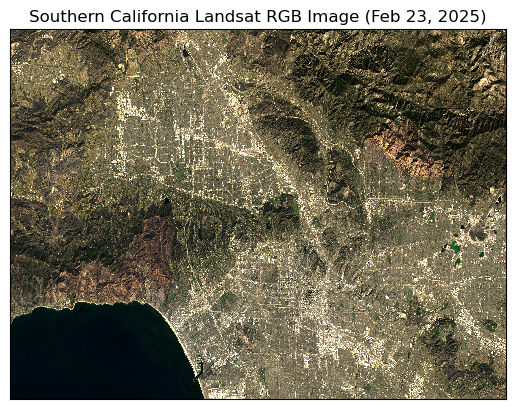

In [39]:
# Create rgb map of Southern California post-fire
figure = (landsat[["red","green","blue"]].to_array()
                                         .plot
                                         .imshow(robust=True)) # Remove outliers with robust

# Add axis labels and title
ax = figure.axes
ax.set_title("Southern California Landsat RGB Image (Feb 23, 2025)")

# Remove ticks 
ax.set_xticks([])         
ax.set_yticks([])  

# Remove x and y labels
ax.set_ylabel("")
ax.set_xlabel("")

### Plot false color image of region impacted by fires

This step plots the region of Southern California that experienced the Eaton and Palisades fires in false color imagery. False color imagery is the practice of assigning non-rgb bands to rgb band colors in order to highlight certain features that are more visible in those non-rgb bands. 

In this case, we plot the nir08 band as green. Nir08 is a band within the near-infrared spectrum, vegetation is highly reflective in this spectrum and therefore we will visualize healthy vegetation as green. We will also plot swir22 as red. Swir22 is a band within the shortwave infrared spectrum, burn scars are highly reflective in this spectrum and therefore we will visualize burn scars as red. This contrast between these bands will highlight burned regions clearer than it would in the rgb visible light spectrum.

Text(0.5, 0, '')

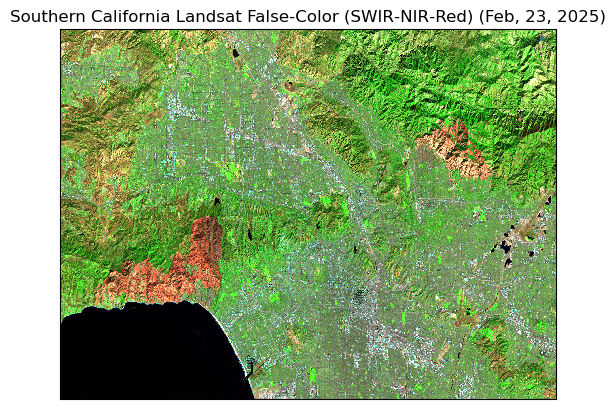

In [40]:
# Create false color image map of Southern California post-fire
figure = (landsat[["swir22","nir08","red"]].to_array()
                                         .plot
                                         .imshow(robust=True)) # Remove outliers with robust

# Add axis labels and title
ax = figure.axes
ax.set_title("Southern California Landsat False‑Color (SWIR‑NIR‑Red) (Feb, 23, 2025)")

# Remove ticks 
ax.set_xticks([])         
ax.set_yticks([])  

# Remove x and y labels
ax.set_ylabel("")
ax.set_xlabel("")

### Map fire perimeters onto false color map


This step will plot the Eaton and Palisades fire perimeters onto our false color map in order for us to see which burn scars correspond to which fire. 

Before we plot the perimeters onto the map we need to make all of their crs match.

In [41]:
# Reproject fire perimeters to match Landsat CRS
eaton = eaton.to_crs(landsat.rio.crs)
palisades = palisades.to_crs(landsat.rio.crs)

# Assert that CRS now match
assert eaton.crs == landsat.rio.crs and palisades.crs == landsat.rio.crs, "CRS mismatch after conversion"


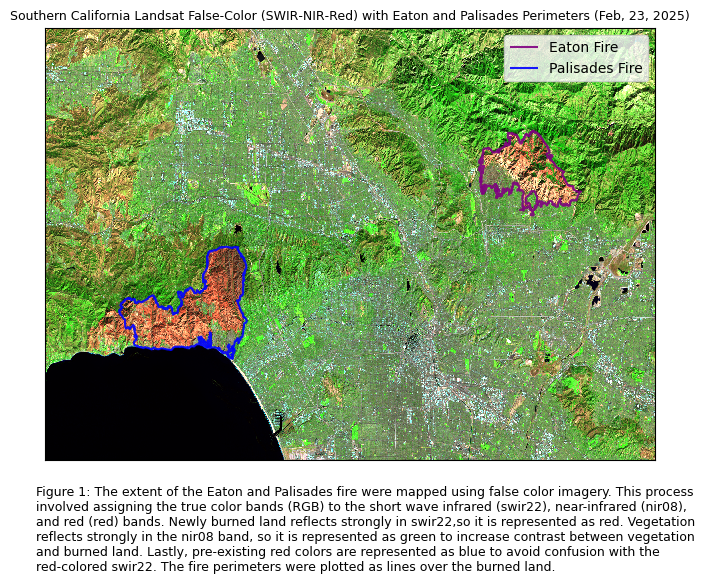

In [42]:
fig, ax = plt.subplots(1, 1)

eaton.boundary.plot( # Plot fire perimeter boundary
    ax = ax, 
    alpha = 0.9,
    edgecolor = "purple",
    label="Eaton Fire")

palisades.boundary.plot( # Plot fire perimeter boundary
    ax = ax, 
    alpha = 0.9,
    edgecolor = "blue",
    label="Palisades Fire")

# Address cloud outlier problem
landsat[["swir22","nir08","red"]].to_array().plot.imshow(ax = ax, 
                                                         robust=True)

ax.set_title('Southern California Landsat False‑Color (SWIR‑NIR‑Red) with Eaton and Palisades Perimeters (Feb, 23, 2025)', fontsize = 9)
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
ax.legend(loc="upper right")

# Remove ticks 
ax.set_xticks([])         
ax.set_yticks([])   

# Remove x and y labels
ax.set_ylabel("")
ax.set_xlabel("")

txt=txt = (
    "Figure 1: The extent of the Eaton and Palisades fire were mapped using false color imagery. This process\n"
    "involved assigning the true color bands (RGB) to the short wave infrared (swir22), near-infrared (nir08),\n"
    "and red (red) bands. Newly burned land reflects strongly in swir22,so it is represented as red. Vegetation\n"
    "reflects strongly in the nir08 band, so it is represented as green to increase contrast between vegetation\n"
    "and burned land. Lastly, pre-existing red colors are represented as blue to avoid confusion with the\n"
    "red-colored swir22. The fire perimeters were plotted as lines over the burned land." 
)
fig.text(.01, -.2, txt, ha='left', size = 9)
plt.tight_layout()
plt.show()

# Eaton and Palisades Social Dimensions

This next analysis will create a map of census tracts within the Eaton and Palisades fire perimeters colored by percentage of the population above age 5 who speak English "less than very well." This is meant to highlight how exclusionary fire warnings issued in these areas could have been, given that they were only given in English and Spanish. 

In order to produce this map I read in census tract-specific environmental justice data for California. Then, I matched its crs to the crs for the Eaton and Palisades fire perimeters. Then, I inner joined them based on geometry to keep all overlapping geometry. Lastly, I clipped these census tracts to the fire perimeters in order to focus on census tracts within the fire perimeter. 

In [43]:
# Read in data EJ data
fp = os.path.join("data","EJI_2024_California", "EJI_2024_California.gdb")
ej = gpd.read_file(fp)

# Reproject crs of ej to Eaton's crs 
ej = ej.to_crs(crs = eaton.crs)

# Spatial join to get boundaries of census tracts and perimeter 
palisades_ej = gpd.sjoin(ej, palisades, 
                         how = "inner")

# Spatial join to get boundaries of census tracts and perimeter 
eaton_ej = gpd.sjoin(ej, eaton, 
                         how = "inner")

# Clip census to Palisades fire perimeter
palisades_clipped = gpd.clip(ej, palisades)

# Clip census to Eaton fire perimeter
eaton_clipped = gpd.clip(ej, eaton)

### Plot Linguistic Isolation in Eaton and Palisades fire perimeters

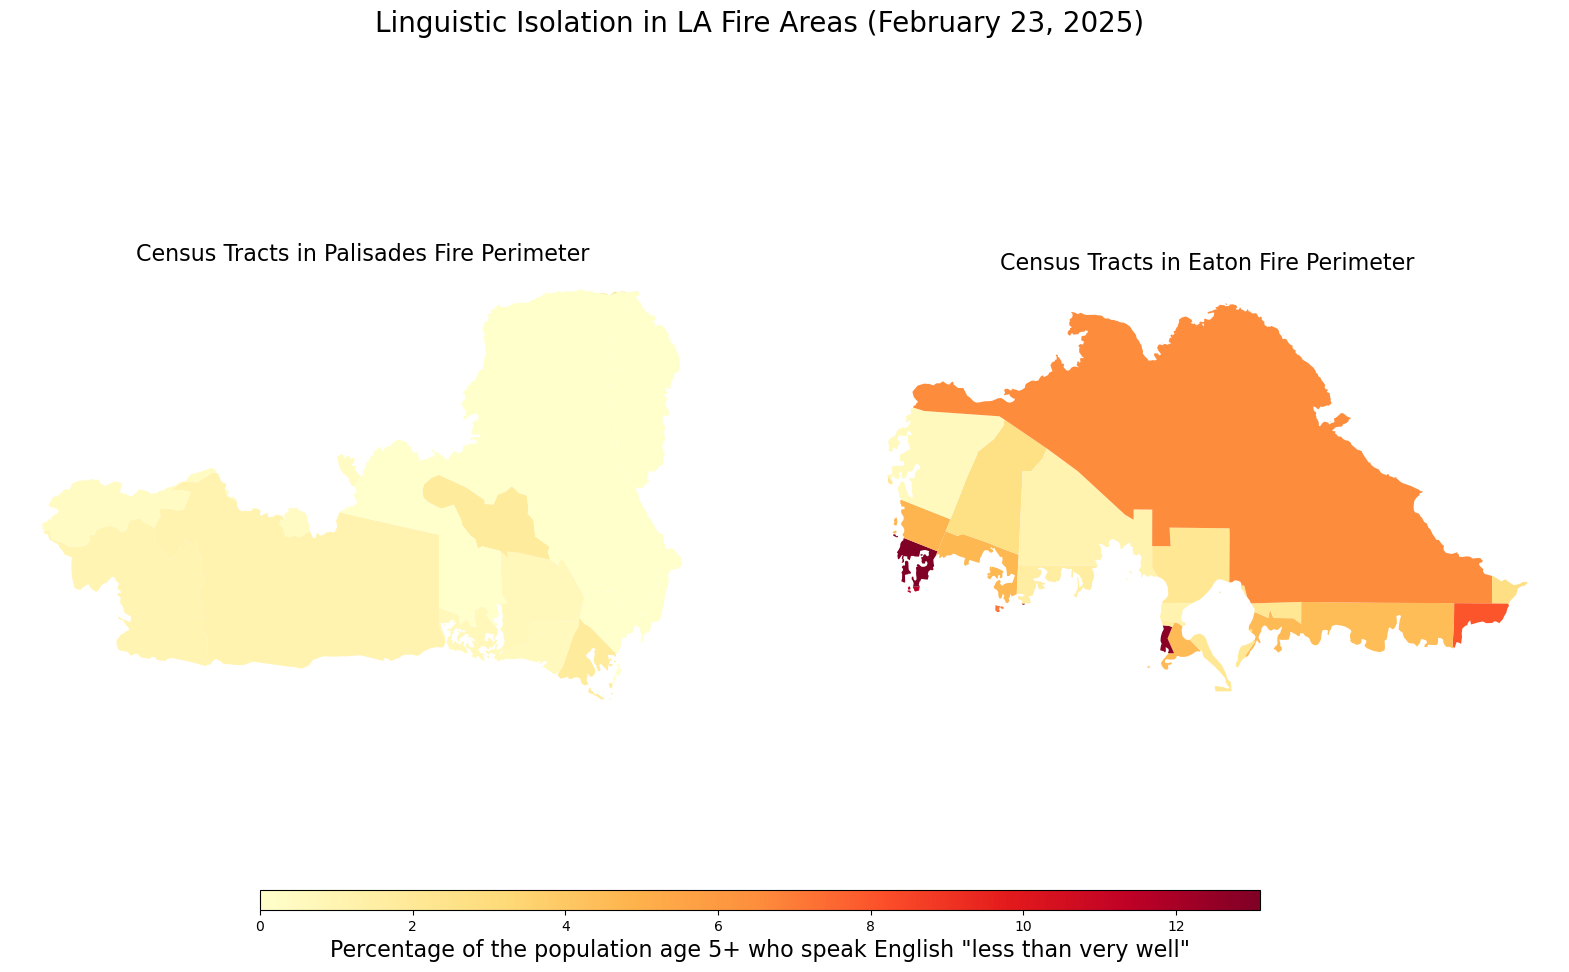

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Select low english proficiency variable
eji_variable = 'E_LIMENG'

# Find common min/max for legend range
vmin = min(palisades_clipped[eji_variable].min(), eaton_clipped[eji_variable].min())
vmax = max(palisades_clipped[eji_variable].max(), eaton_clipped[eji_variable].max())

# Plot census tracts within Palisades perimeter
palisades_clipped.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    cmap='YlOrRd',  
    ax=ax1,
)
ax1.set_title('Census Tracts in Palisades Fire Perimeter', fontsize=16)
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_clipped.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    cmap='YlOrRd',  
    ax=ax2,
)
ax2.set_title('Census Tracts in Eaton Fire Perimeter', fontsize=16)
ax2.axis('off')

# Add overall title
fig.suptitle('Linguistic Isolation in LA Fire Areas (February 23, 2025)', fontsize=20)

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))  
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Percentage of the population age 5+ who speak English "less than very well"', fontsize=16)

plt.show()

**Discussion:**
This plot higlights the fact that a significant portion of census tracts affected by the Eaton fire contained a notable percentage of the population that spoke English less than very well. This comes to show that there is a need for multilingual emergency systems. At the time the emergency system warnings were only in English and Spanish, but there are thousands of folks who do not speak either well who were affected by these fires - notably members of the Asian community (UCLA Asian American Studies Center). In the future these warnings should be translated to variety of languages to ensure everyone has access to this life saving information. 

It is important to note the LEP metric used in this analysis includes all individuals who speak English "less than well," which includes Spanish speakers who did receive alerts in Spanish. This means this visualizations overestimates the population that was truly excluded from emergency communications.